In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import asteroid_family

# Asteroid Family Package -- Functions:

- asteroid_family.homogeneus_family: create a homogeneus asteroid family

- asteroid_family.differentiated_family: create a homogeneus asteroid family

- asteroid_family.mass_distribution: create a mass distribution normalized by the total mass

- asteroid_family.min_Vej: minimum ejection velocity

- asteroid_family.mean_vej: maximum ejection velocity

- asteroid_family.mean_vej_distribution: 

- asteroid_family.velocity_field

- asteroid_family.catastrophic_energy: obtain the catactrophic energy based on a model from Stewart and Leinhardt(2009).

- asteroid_family.yarkovsky_dadt: obntain the semi-axis varition in time from the Yarksovskt Effect in function of the physical parameters of the asteroid

- asteroid_family.yakovsky_change_unit: function to change the units of dat/dt from asteroid_family.yarkovsky_dadt

- asteroid_family.mag_absoluta: obtain the absolute magnitude, H, for a set of asteroids, given a geometric albedo and diameter. Based on Parker et al.(2008).

## Including information for the parental body }and its location on asteroid min belt

In [3]:
#Parental data
rpb = 20 #km

rho_mantle = 3.
rho_core = 7.

pv_mantle = 0.4
pv_core = 0.15

Vi = 5 #km/s impact velocity
fke = 0.01 #inelastic

In [4]:
#location in the Main Belt --> same as 298 Baptistina
M       = 280.1642437983165 #degrees
peri    = 135.1543076468920 #degrees
node    = 8.253490030039535 #degrees
i       = 6.28752726137564 #degrees
e       = 0.09612545504215386
a       = 2.26362004764974 #AU
period  = 3.41 #year
ano     = 2013
mes     = 11
dia     = 4
da0     = 0

## Creating the synthetic differentiated asteroid family

In [7]:
help(asteroid_family.differentiated_family)

Help on function differentiated_family in module asteroid_family:

differentiated_family(composition, rpb, rho_mantle, rho_core, Vi, fke, maximum, pv_core, pv_mantle, show_time)
    composition: string. Given the initial meteoritic composition for estimate the core radius. Using data from Gaffey et al.(1993).
    Compostion can be use 'H' for condritic ordinary H composition, 'L' for ordinary L composition, 'LL' for ordinary LL composition,
    'CO' for condritic carbonaceus O composition, and 'CV' for condritic carbonaceus V composition.
    
    rpb: radius of the parental body in kilometers.
    
    rho_mantle: density of the mantle in c.g.s. units.
    
    rho_core: density of the core in c.g.s. units.
    
    Vi: impact velocity in km/s.
    
    fke: inelastic of the parental body.
    
    maximum: value of the maximum mass of the distrbution of the fragments.
    
    pv_core: geometric albedo for the fragments from the core of the parental body.
    
    pv_mantle: geometri

In [38]:
mass, vej, rho, radius, mag = asteroid_family.differentiated_family('H',rpb,rho_mantle,rho_core,
                                                          Vi,fke,0.5,pv_core,pv_mantle,'YES')


 Obtain velocity field: duration [seconds] = 0.22031927108764648



## Obtain the Initial velocity field

In [39]:
VT, VR, VW, A, E, I, dA, dE, dI = asteroid_family.gauss_equations(vej, a, e, i, period, 'YES')


 Applied Gauss Equations: duration [seconds] = 0.026523590087890625



## Obtain the semi-axis variation in time from the Yarkovsky effect

In [40]:
dadt = asteroid_family.yarkovsky_dadt(2*radius,np.random.uniform(0,np.pi,len(mass))*180./np.pi)

## Saving in a dataframe and .csv file using Pandas Package

In [34]:
data = pd.DataFrame([massa, vej, rho, raio, mag,VT, VR, VW, A, E, I, dA, dE, dI, dadt]).T
data.columns = ['mass', 'vej', 'density', 'radius', 'H', 'VT', 
                'VR', 'VW', 'A', 'E', 'I', 'dA', 'dE', 'dI', 'dadt']

In [35]:
data

,mass,vej,density,radius,H,VT,VR,VW,A,E,I,dA,dE,dI,dadt
0,3.533296e+15,0.013466,3.0,0.655124,16.068289,0.000342,-0.000447,-7.533403e-04,2.263173,0.096215,6.277139,-0.000447,8.967191e-05,-0.010388,-0.000118
1,3.533296e+15,0.012354,3.0,0.655124,16.068289,0.000598,-0.000089,-9.772751e-04,2.263586,0.096269,6.274052,-0.000034,1.437093e-04,-0.013476,-0.000160
2,3.533296e+15,0.032576,3.0,0.655124,16.068289,0.001600,0.002153,3.069643e-03,2.266116,0.096466,6.329854,0.002496,3.401742e-04,0.042327,-0.000002
3,3.533296e+15,0.009537,3.0,0.655124,16.068289,-0.000081,-0.000008,1.253193e-04,2.263603,0.096106,6.289255,-0.000017,-1.915610e-05,0.001728,-0.000079
4,3.533296e+15,0.013422,3.0,0.655124,16.068289,0.000269,-0.000311,3.541764e-04,2.263312,0.096195,6.292411,-0.000308,6.970471e-05,0.004884,0.000188
5,3.533296e+15,0.029660,3.0,0.655124,16.068289,-0.001064,-0.001114,-2.252028e-03,2.262304,0.095893,6.256474,-0.001316,-2.321561e-04,-0.031053,0.000103
6,3.541441e+15,0.012505,3.0,0.655627,16.066623,-0.000177,0.001217,-1.449824e-04,2.264918,0.096061,6.285528,0.001298,-6.470180e-05,-0.001999,0.000014
7,3.541441e+15,0.025085,3.0,0.655627,16.066623,0.000026,0.000197,-9.275927e-04,2.263836,0.096128,6.274737,0.000216,2.541357e-06,-0.012791,-0.000168
8,3.541441e+15,0.019194,3.0,0.655627,16.066623,-0.000273,0.000406,2.267756e-03,2.264030,0.096053,6.318797,0.000410,-7.250570e-05,0.031270,0.000113
9,3.541441e+15,0.044719,3.0,0.655627,16.066623,-0.002916,-0.001946,3.126377e-03,2.261212,0.095468,6.330637,-0.002408,-6.570623e-04,0.043109,-0.000176


(-0.0001901974325425196, 0.0001899973230053586)

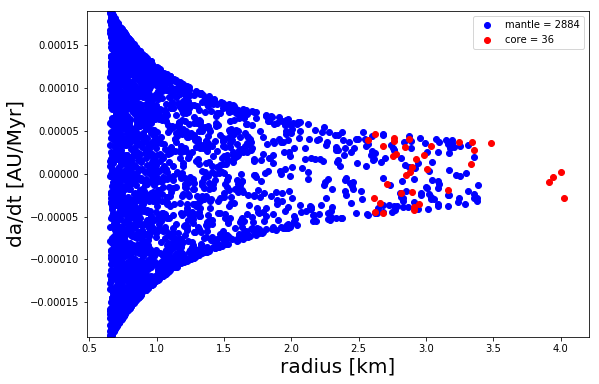

In [46]:
plt.figure(figsize=(9,6))
#plt.grid(color='white')
plt.scatter(data.radius[data.density == 3],data.dadt[data.density == 3], 
            color='blue', label='mantle = '+str(len(data.E[data.density == 3])))
plt.scatter(data.radius[data.density == 7],data.dadt[data.density == 7], 
            color='red', label='core = '+str(len(data.E[data.density == 7])))
plt.legend()
plt.xlabel('radius [km]', fontsize=20)
plt.ylabel('da/dt [AU/Myr]', fontsize=20)
plt.ylim(min(data.dadt),max(data.dadt))

In [47]:
data.to_csv('synthetic_differentiated_family.csv')